In [7]:
import draftAnal as DA
import os

DA.resetFolder("./Data/WORKING")

In [8]:
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd
import numpy as np
import pickle as pk

## Determine Composition of the Data from INPUT folder

In [9]:
Data = []

for i, directory in enumerate(next(os.walk('./Data/INPUT/'))[1]):
    Data.append(DA.author(directory.lower()))

COLLIAUX
LORETO
UBALDI
MONECHI
BENTKOWSKI
PULLANO
AOUAMEUR
VANTRIJP
ZAVOJANNI
WANJEK
GRAVINO
TANI
COLIZZA
POLETTO
PINOTTI
PETRI
VALDANO
LONDEI
BOKANYI
HANAPPE
SORGER
AHNE
ROUX
TEMIME


## Clean the filenames in order to be easyer to use in the future

In [10]:
for i, author in enumerate(Data):
    author.cleanfilenames()
    Data[i] = author

In [11]:
for i, author in enumerate(Data):
    for j,draft in enumerate(author.drafts):
        draft.CountWords()
        author.drafts[j] = draft
    Data[i] = author

## Calculate the cross compressibility within drafts of a same author

In [12]:
for i, author in enumerate(Data):
    print(author.name)
    author.createContigs()
    Data[i] = author

colliaux
loreto
ubaldi
monechi
bentkowski
pullano
aouameur
vantrijp
zavojanni
wanjek
gravino
tani
colizza
poletto
pinotti
petri
valdano
londei
bokanyi
hanappe
sorger
ahne
roux
temime


In [13]:
for i, author in enumerate(Data):
    print(author.name)
    author.slide(C=True)
    Data[i] = author

colliaux


/Users/cosy/draftanalysis/PACCHETTO_ruggieroDraft/draftAnal.py:286: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  slid = pd.read_csv("ContigSliding.csv", sep="\t", header=None, skipfooter=1)


loreto
ubaldi


/Users/cosy/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/cosy/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/cosy/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


monechi
bentkowski
pullano
aouameur
vantrijp
zavojanni
wanjek
gravino
tani
colizza
poletto
pinotti
petri
valdano
londei
bokanyi
hanappe
sorger
ahne
roux
temime


In [29]:
Data[1].drafts[1].sliding.avg

0    3.724211
dtype: float64

In [19]:
for i, author in enumerate(Data):
    print(author.name)
    author.FindLastMacro()
    Data[i]=author

colliaux
loreto
ubaldi
monechi
bentkowski
pullano
aouameur
vantrijp
zavojanni
wanjek
gravino
tani
colizza
poletto
pinotti
petri
valdano
londei
bokanyi
hanappe
Copy_of_SEW1_HANAPPE_2_-_30_January__17_55 is last edit of draft 4
sorger
ahne
roux
temime


## Save Data

In [16]:
pk.dump( Data, open( "./Data/OUTPUT/Data_06_11.p", "wb" ) )

## Plot the cross compressibility for the last draft in the author work

NameError: name 'last_draft' is not defined

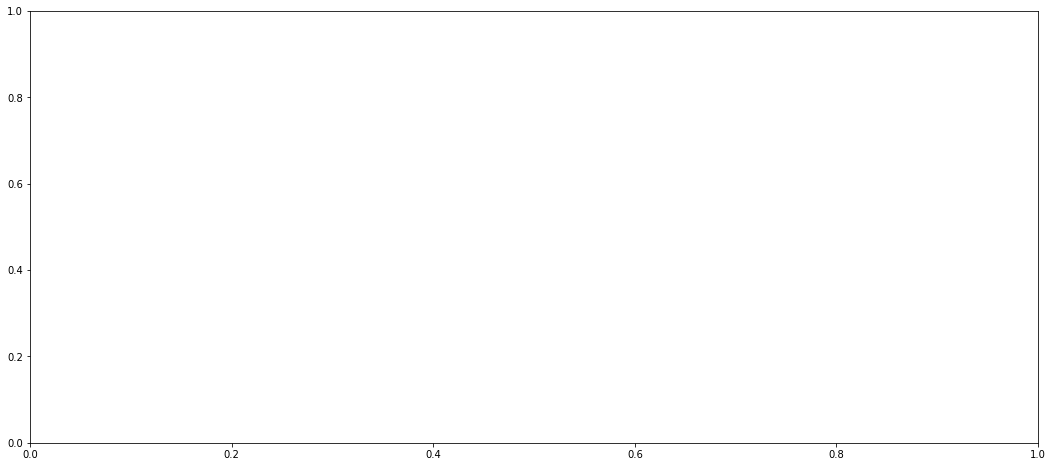

In [20]:
x = np.linspace(0, 5, 100)
cmap = plt.get_cmap('jet')
fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([1,1,1,1])
N = len(Data)
for i,author in enumerate(Data):
    color = cmap(float(i)/N)
    author.drafts[last_draft[author.name]].contigData.plot(ax = ax, x='Edit_norm', y='distance', c=color, label=author.name)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('LastDraftCE.png', bbox_inches='tight',format='png')

In [21]:
Data[5].drafts[last_draft['pullano']].contigData

NameError: name 'last_draft' is not defined

NameError: name 'last_draft' is not defined

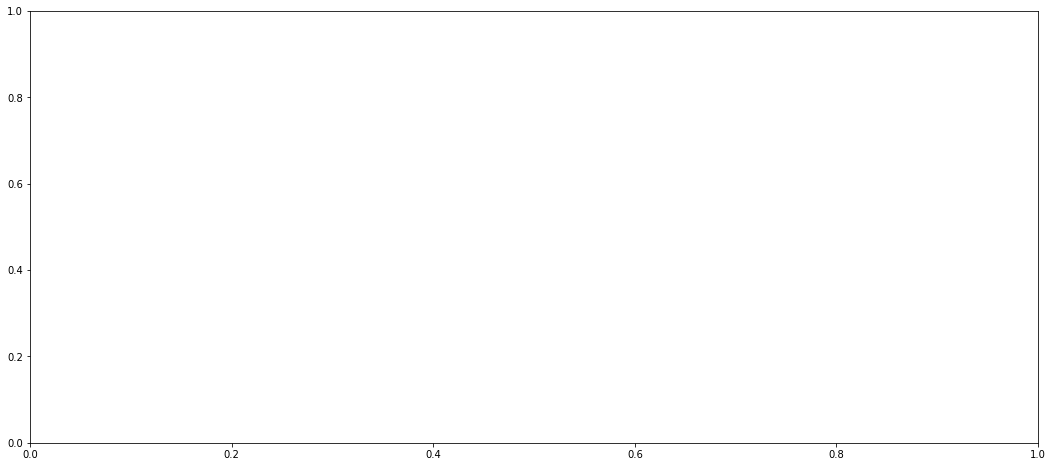

In [22]:
import datetime as datetime
x = np.linspace(0, 5, 100)
cmap = plt.get_cmap('jet')
fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([1,1,1,1])
N = len(Data)
for i,author in enumerate(Data):
    color = cmap(float(i)/N)
    author.drafts[last_draft[author.name]].contigData.reset_index().plot(ax = ax, x='datetime', y='distance', c=color, label=author.name)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim([datetime.datetime(2019, 1, 30, 10, 00), datetime.datetime(2019, 1, 31, 20,00)])
plt.savefig('LastDraftCErealTime.png', bbox_inches='tight',format='png')

## Plot different properties of the cross compressibility within drafts

AttributeError: 'DataFrame' object has no attribute 'avg'

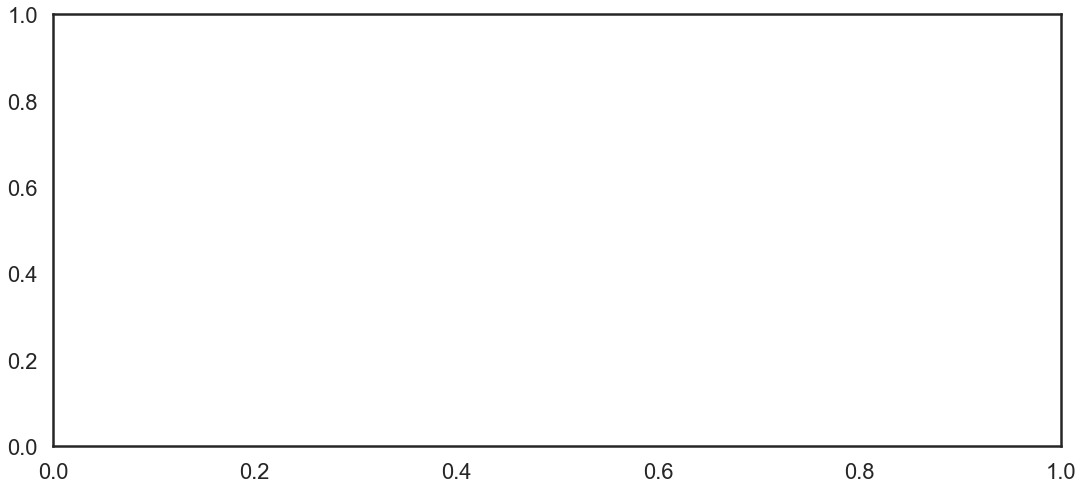

In [26]:
DA.plot_sliding_prop(Data, 'avg')

In [ ]:
DA.plot_sliding_prop(Data, 'var')

In [ ]:
DA.plot_sliding_prop(Data, 'var1')

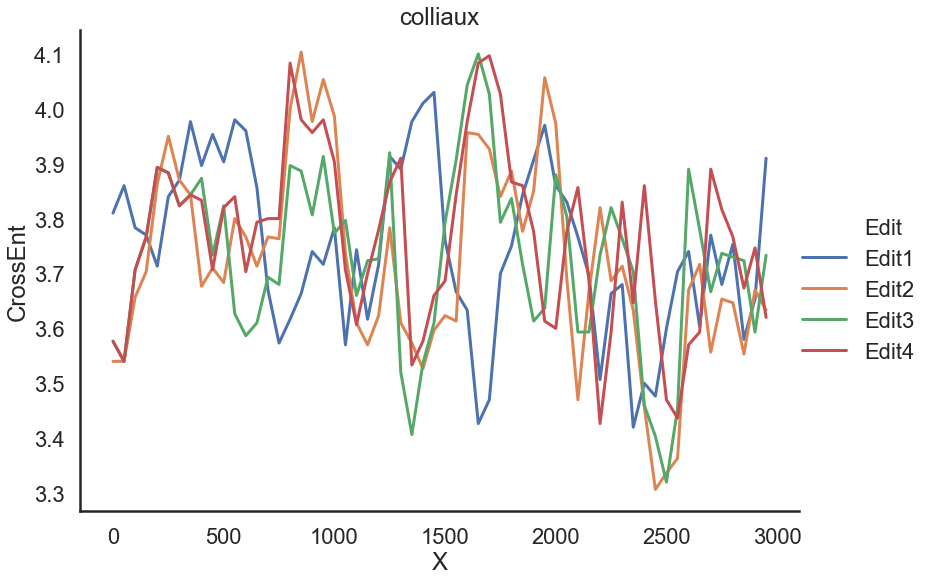

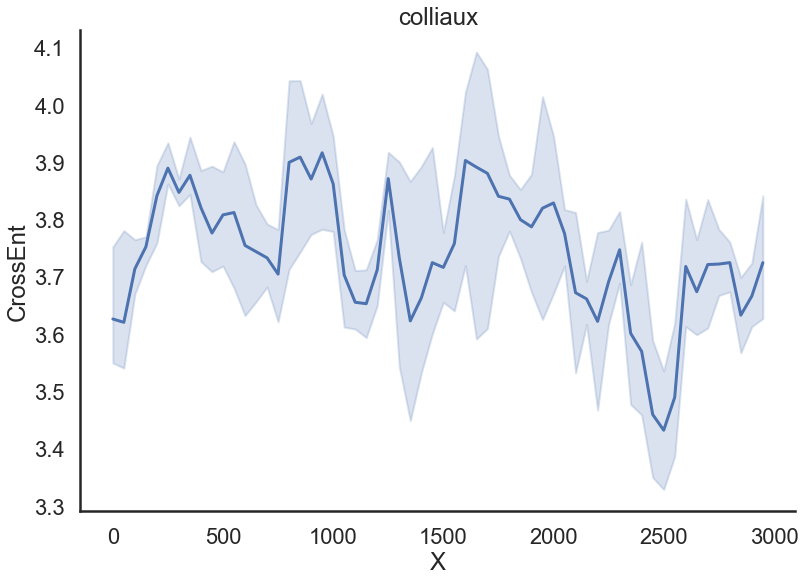

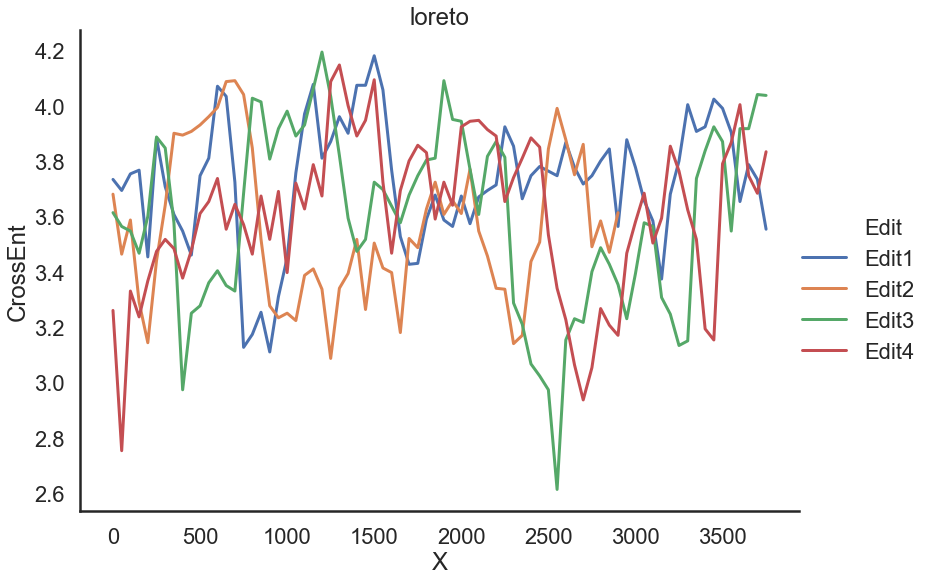

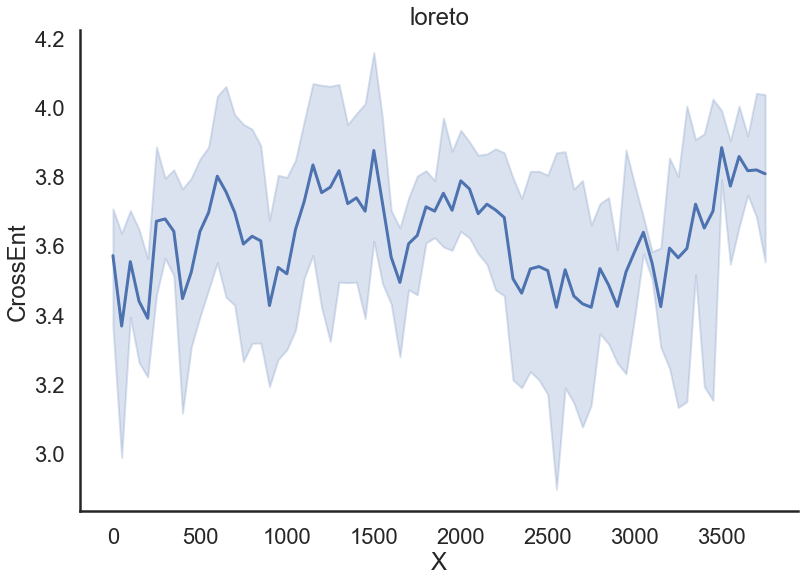

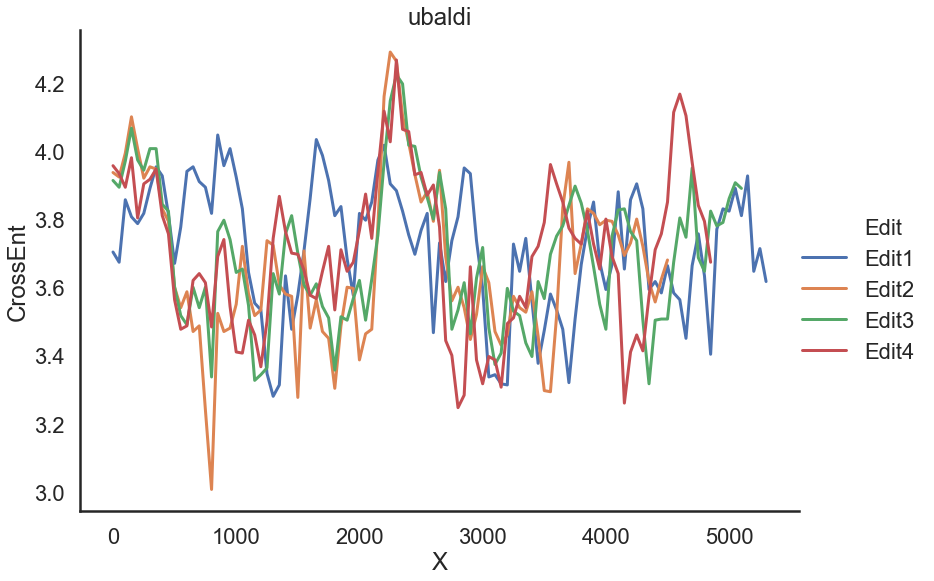

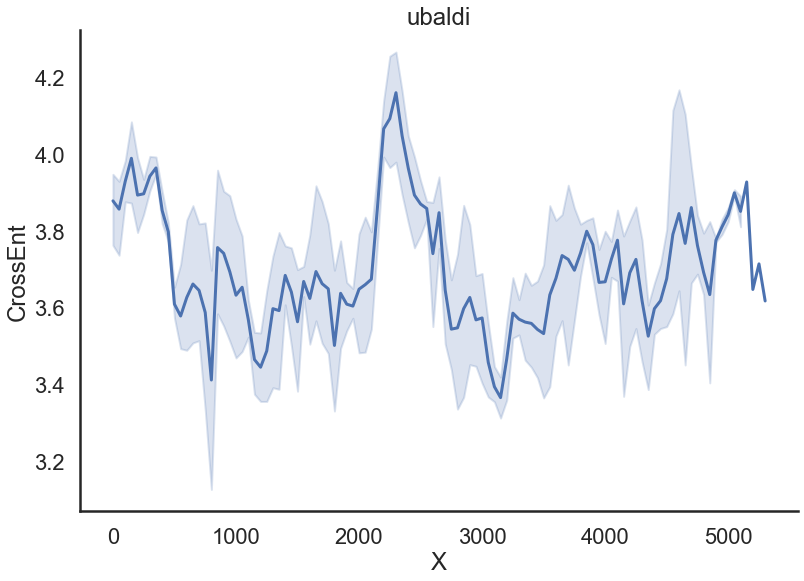

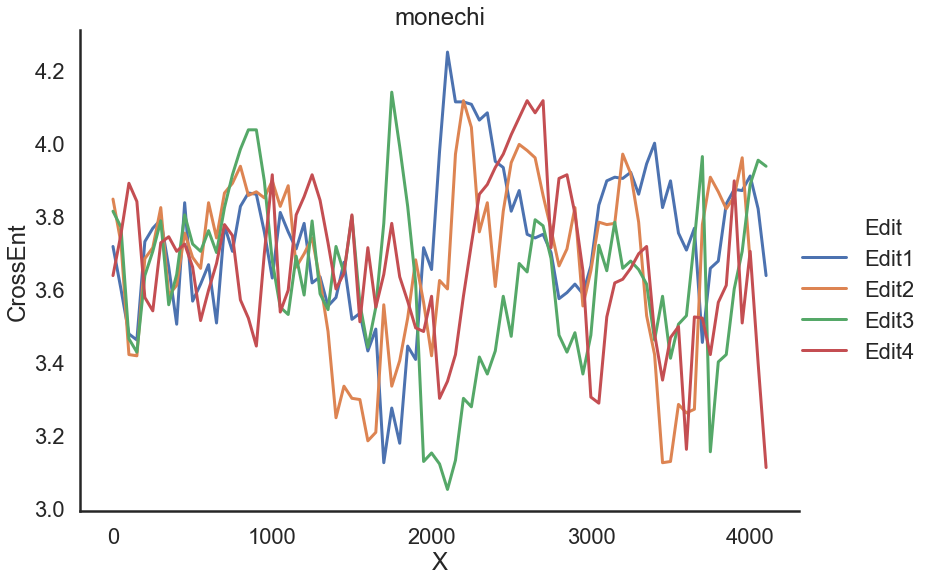

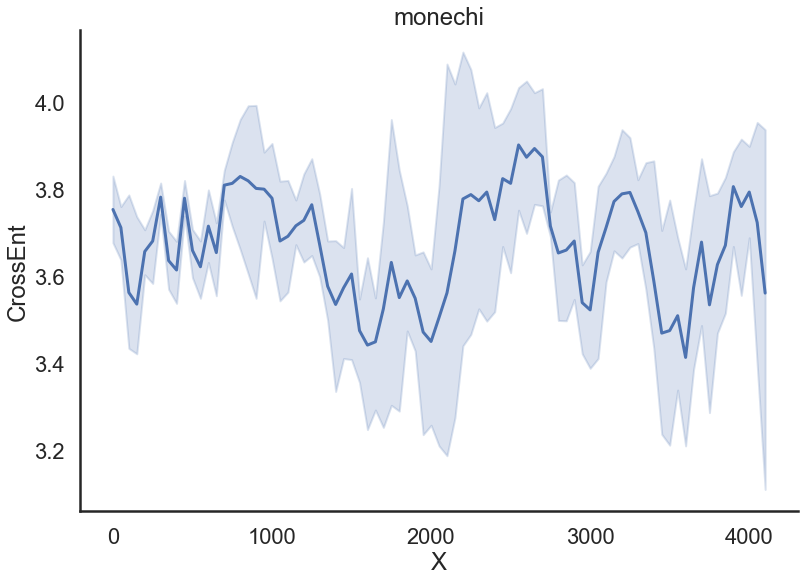

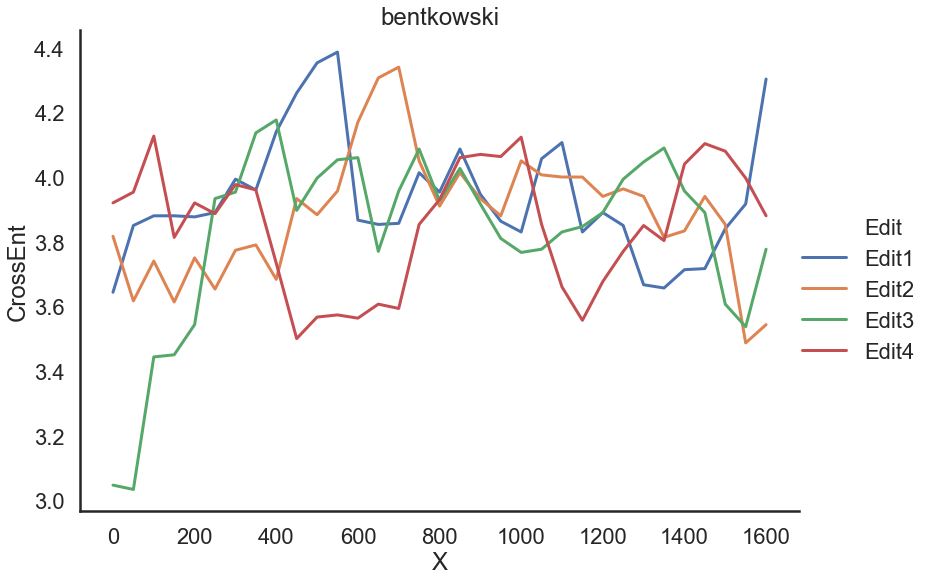

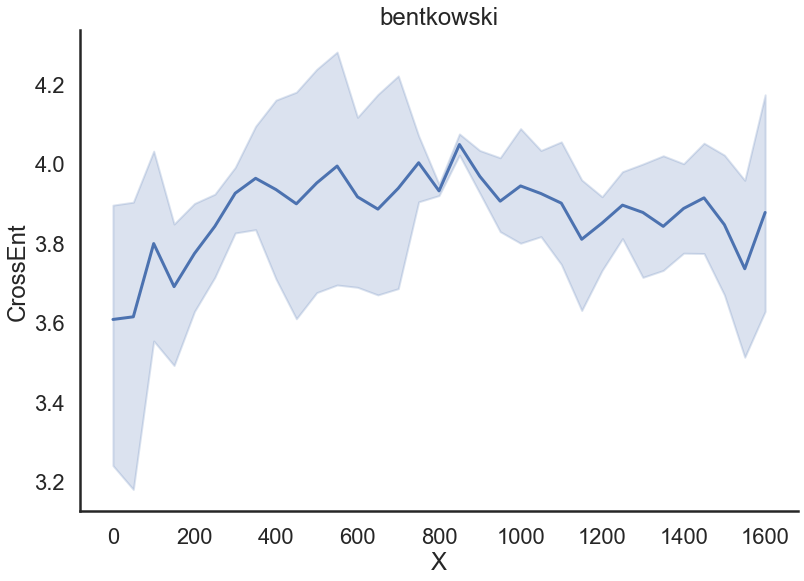

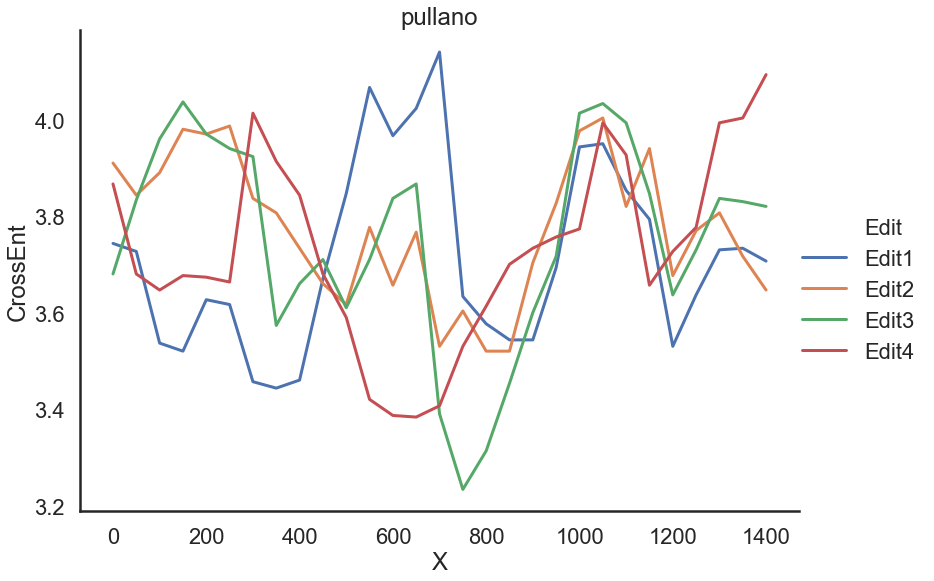

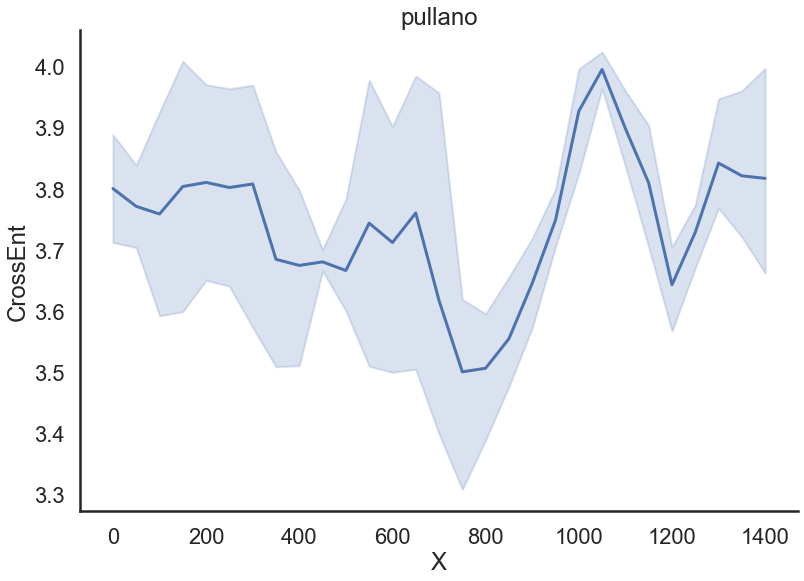

In [24]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,9)})
sns.set_style("white")
sns.set_context("poster")
for i,author in enumerate(Data[:6]):
    df = author.drafts[author.Last1].sliding.data
    df = df.reset_index()
    df['X'] = df['index']*50
    df['Edit1'] =df[0]
    del(df[0])
    df['Edit2'] = author.drafts[author.Last2].sliding.data[0]
    df['Edit3'] = author.drafts[author.Last3].sliding.data[0]
    df['Edit4'] = author.drafts[author.Last4].sliding.data[0]
    df['Author'] = author.name


    df = df.melt(id_vars=['index', 'X', 'Author'], var_name='Edit', value_name='CrossEnt')
    g=sns.relplot( x="X", y='CrossEnt', kind="line", data=df, hue='Edit',
                  height=8.27, aspect=11.7/8.27)
    sns.despine()
    plt.title(author.name)
    
    g=sns.relplot( x="X", y='CrossEnt', kind="line", data=df,
                  height=8.27, aspect=11.7/8.27)
    sns.despine()
    plt.title(author.name)